Get the geometry from the Kaggle competetion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [3]:
detData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18728 entries, 0 to 18727
Data columns (total 21 columns):
volume_id       18728 non-null int64
layer_id        18728 non-null int64
module_id       18728 non-null int64
cx              18728 non-null float64
cy              18728 non-null float64
cz              18728 non-null float64
rot_xu          18728 non-null float64
rot_xv          18728 non-null float64
rot_xw          18728 non-null float64
rot_yu          18728 non-null float64
rot_yv          18728 non-null float64
rot_yw          18728 non-null float64
rot_zu          18728 non-null int64
rot_zv          18728 non-null int64
rot_zw          18728 non-null int64
module_t        18728 non-null float64
module_minhu    18728 non-null float64
module_maxhu    18728 non-null float64
module_hv       18728 non-null int64
pitch_u         18728 non-null float64
pitch_v         18728 non-null float64
dtypes: float64(14), int64(7)
memory usage: 3.0 MB


Get the number of phi modules

In [4]:
nModulesPhi = {}
#(detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 6) & (detData["cz"] == 35)])
for detItr in [8,13,17]:
    nModulesPhi[detItr] = {}
    for lItr in [2,4,6,8]:
        if detItr == 17 and lItr > 4: continue
            
        nModulesPhi[detItr][lItr] = detData[(detData["volume_id"] == detItr) & (detData["layer_id"] == lItr)]["cz"].value_counts().iloc[0]
nModulesPhi

{8: {2: 16, 4: 32, 6: 52, 8: 78},
 13: {2: 40, 4: 56, 6: 78, 8: 102},
 17: {2: 120, 4: 152}}

In [5]:
module_maxhu = {}
module_minhu = {}
for detItr in [8,13,17]:
    module_maxhu[detItr] = {}
    module_minhu[detItr] = {}    
    for lItr in [2,4,6,8]:
        if detItr == 17 and lItr > 4: continue

        module_maxhu[detItr][lItr] = detData[(detData["volume_id"] == detItr) & (detData["layer_id"] == lItr)]["module_maxhu"].iloc[0]
        module_minhu[detItr][lItr] = detData[(detData["volume_id"] == detItr) & (detData["layer_id"] == lItr)]["module_minhu"].iloc[0]        

print(module_maxhu)
print(module_minhu)


{8: {2: 8.4, 4: 8.4, 6: 8.4, 8: 8.4}, 13: {2: 24.0, 4: 24.0, 6: 24.0, 8: 24.0}, 17: {2: 24.0, 4: 24.0}}
{8: {2: 8.4, 4: 8.4, 6: 8.4, 8: 8.4}, 13: {2: 24.0, 4: 24.0, 6: 24.0, 8: 24.0}, 17: {2: 24.0, 4: 24.0}}


In [6]:
#detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 8)]["module_minhu"]

In [7]:
(detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2)])
detData["phi_id"] = detData["module_id"]
detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2)]["phi_id2"] = detData["module_id"] % 16
detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2)]

/Users/johnda/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


volume_id  layer_id  module_id        cx        cy     cz    rot_xu  \
756          8         2          1 -31.63030  -6.29166 -455.0  0.330043   
757          8         2          2 -26.81490 -17.91710 -455.0  0.666160   
758          8         2          3 -17.91710 -26.81490 -455.0  0.900861   
759          8         2          4  -6.29166 -31.63030 -455.0  0.998413   
760          8         2          5   6.29166 -31.63030 -455.0  0.943966   
761          8         2          6  17.91710 -26.81490 -455.0  0.745809   
762          8         2          7  26.81490 -17.91710 -455.0  0.434109   
763          8         2          8  31.63030  -6.29166 -455.0  0.056320   
764          8         2          9  31.63030   6.29166 -455.0 -0.330043   
765          8         2         10  26.81490  17.91710 -455.0 -0.666160   
766          8         2         11  17.91710  26.81490 -455.0 -0.900861   
767          8         2         12   6.29166  31.63030 -455.0 -0.998413   
768          8         2         13  -6.29166  31.63030 -455.0 -0.943966   
769          8         2         14 -17.91710  26.81490 -455.0 -0.745809   
770          8         2         15 -26.81490  17.91710 -455.0 -0.434109   
771          8         2         16 -31.63030   6.29166 -455.0 -0.056320   
772          8         2         17 -31.13990  -6.19412 -385.0  0.330043   
773          8         2         18 -26.39920 -17.63940 -385.0  0.666160   
774          8         2         19 -17.63940 -26.39920 -385.0  0.900861   
775          8         2         20  -6.19412 -31.13990 -385.0  0.998413   
776          8         2         21   6.19412 -31.13990 -385.0  0.943966   
777          8         2         22  17.63940 -26.39920 -385.0  0.745809   
778          8         2         23  26.39920 -17.63940 -385.0  0.434109   
779          8         2         24  31.13990  -6.19412 -385.0  0.056320   
780          8         2         25  31.13990   6.19412 -385.0 -0.330043   
781          8         2         26  26.39920  17.63940 -385.0 -0.666160   
782          8         2         27  17.63940  26.39920 -385.0 -0.900861   
783          8         2         28   6.19412  31.13990 -385.0 -0.998413   
784          8         2         29  -6.19412  31.13990 -385.0 -0.943966   
785          8         2         30 -17.63940  26.39920 -385.0 -0.745809   
..         ...       ...        ...       ...       ...    ...       ...   
950          8         2        195 -17.91710 -26.81490  385.0  0.900861   
951          8         2        196  -6.29166 -31.63030  385.0  0.998413   
952          8         2        197   6.29166 -31.63030  385.0  0.943966   
953          8         2        198  17.91710 -26.81490  385.0  0.745809   
954          8         2        199  26.81490 -17.91710  385.0  0.434109   
955          8         2        200  31.63030  -6.29166  385.0  0.056320   
956          8         2        201  31.63030   6.29166  385.0 -0.330043   
957          8         2        202  26.81490  17.91710  385.0 -0.666160   
958          8         2        203  17.91710  26.81490  385.0 -0.900861   
959          8         2        204   6.29166  31.63030  385.0 -0.998413   
960          8         2        205  -6.29166  31.63030  385.0 -0.943966   
961          8         2        206 -17.91710  26.81490  385.0 -0.745809   
962          8         2        207 -26.81490  17.91710  385.0 -0.434109   
963          8         2        208 -31.63030   6.29166  385.0 -0.056320   
964          8         2        209 -31.13990  -6.19412  455.0  0.330043   
965          8         2        210 -26.39920 -17.63940  455.0  0.666160   
966          8         2        211 -17.63940 -26.39920  455.0  0.900861   
967          8         2        212  -6.19412 -31.13990  455.0  0.998413   
968          8         2        213   6.19412 -31.13990  455.0  0.943966   
969          8         2        214  17.63940 -26.39920  455.0  0.745809   
970          8         2        215  26.39920 -17.639

In [8]:
print(detData.iloc[756])
type(detData.iloc[756])

volume_id         8.000000
layer_id          2.000000
module_id         1.000000
cx              -31.630300
cy               -6.291660
cz             -455.000000
rot_xu            0.330043
rot_xv            0.000000
rot_xw           -0.943966
rot_yu           -0.943966
rot_yv            0.000000
rot_yw           -0.330043
rot_zu            0.000000
rot_zv            1.000000
rot_zw            0.000000
module_t          0.150000
module_minhu      8.400000
module_maxhu      8.400000
module_hv        36.000000
pitch_u           0.050000
pitch_v           0.056250
phi_id            1.000000
Name: 756, dtype: float64


pandas.core.series.Series

In [9]:
from module import module
testMod = module()
testMod.initFromFile(detData.iloc[756])
print(testMod.corners_l.shape)
print(testMod.rot_localToGlobal.shape)
print(testMod.corners_g.shape)
print(testMod.corners_l)
print(testMod.corners_g)
print("modEdges")
print(testMod.modEdges)
print(testMod.modEdges[0])
print("corners")
print(testMod.corners_g[:,1], testMod.corners_g[:,0])
print("phiEdges")
print(testMod.phiEdges)


print("modSlop")
print(testMod.modOffsetXY)

print("modSlop")
print(testMod.modSlopeXY)


(5, 3)
(3, 3)
(5, 3)
[[  8.4  36.    0. ]
 [  8.4 -36.    0. ]
 [ -8.4 -36.    0. ]
 [ -8.4  36.    0. ]
 [  8.4  36.    0. ]]
[[ -28.8579388  -14.2209744 -419.       ]
 [ -28.8579388  -14.2209744 -491.       ]
 [ -34.4026612    1.6376544 -491.       ]
 [ -34.4026612    1.6376544 -419.       ]
 [ -28.8579388  -14.2209744 -419.       ]]
modEdges
[[-28.8579388 -34.4026612]
 [-14.2209744   1.6376544]]
[-28.8579388 -34.4026612]
corners
[-14.2209744 -14.2209744   1.6376544   1.6376544 -14.2209744] [-28.8579388 -28.8579388 -34.4026612 -34.4026612 -28.8579388]
phiEdges
[3.59945762 3.09402601]
modSlop
-96.75844090370046
modSlop
-2.860130346651801


In [10]:
testMod.corners_l[:,0]

array([ 8.4,  8.4, -8.4, -8.4,  8.4])

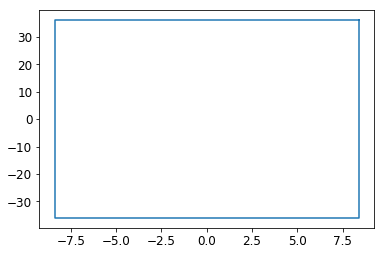

In [11]:
plt.plot(testMod.corners_l[:,0],testMod.corners_l[:,1])

[[ -28.8579388  -14.2209744 -419.       ]
 [ -28.8579388  -14.2209744 -491.       ]
 [ -34.4026612    1.6376544 -491.       ]
 [ -34.4026612    1.6376544 -419.       ]
 [ -28.8579388  -14.2209744 -419.       ]]
[-28.8579388 -34.4026612]
[-14.2209744   1.6376544]


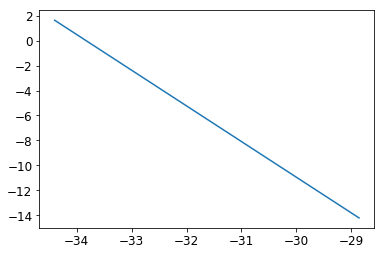

In [12]:
print(testMod.corners_g)
print(testMod.corners_g[1:3,0])
print(testMod.corners_g[1:3,1])
plt.plot(testMod.corners_g[1:3,0],testMod.corners_g[1:3,1])

In [13]:
print(detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 2)]['cz'].value_counts())
print(detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 2)]['cz'].value_counts())


-927.0     40
 824.0     40
-824.0     40
-412.0     40
-206.0     40
-103.0     40
 0.0       40
 103.0     40
 206.0     40
 412.0     40
-721.0     40
 309.0     40
 1030.0    40
-618.0     40
 721.0     40
 618.0     40
-515.0     40
-309.0     40
 927.0     40
 515.0     40
-1030.0    40
Name: cz, dtype: int64
 515.0     120
-618.0     120
 0.0       120
 103.0     120
 1030.0    120
 309.0     120
-721.0     120
-103.0     120
 824.0     120
 618.0     120
-206.0     120
-515.0     120
 412.0     120
 927.0     120
-927.0     120
-1030.0    120
-412.0     120
 206.0     120
 721.0     120
-309.0     120
-824.0     120
Name: cz, dtype: int64


In [14]:
layerData = [
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 4) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 6) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 8) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 2) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 4) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 6) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 8) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 2) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 4) & (detData["cz"] == 0)],
]
nModulesInPhi = []
for ld in layerData:
    nModulesInPhi.append(len(ld))
nModulesInPhi


[16, 32, 52, 78, 40, 56, 78, 102, 120, 152]

In [15]:
layerData[0].iloc[0]["cx"]*layerData[0].iloc[0]["cx"]

969.6933720100001

In [16]:
#detGeo = detector2D(layerData)

from detectorGeo import detectorGeo
detGeo = detectorGeo()
detGeo.initFromFile(layerData,nModulesInPhi)

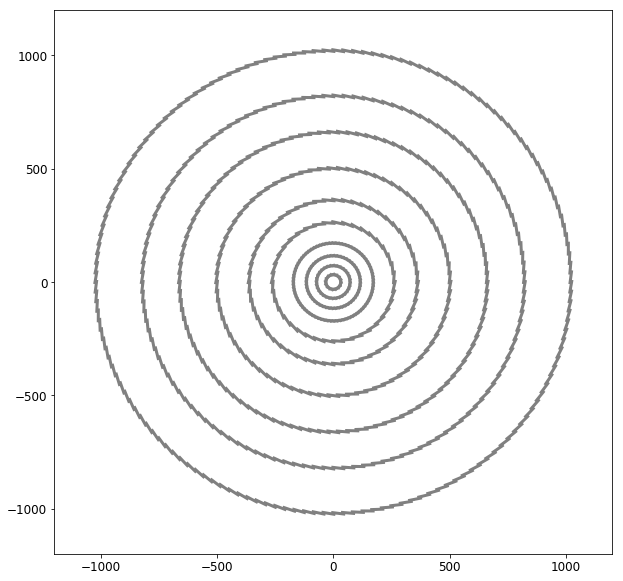

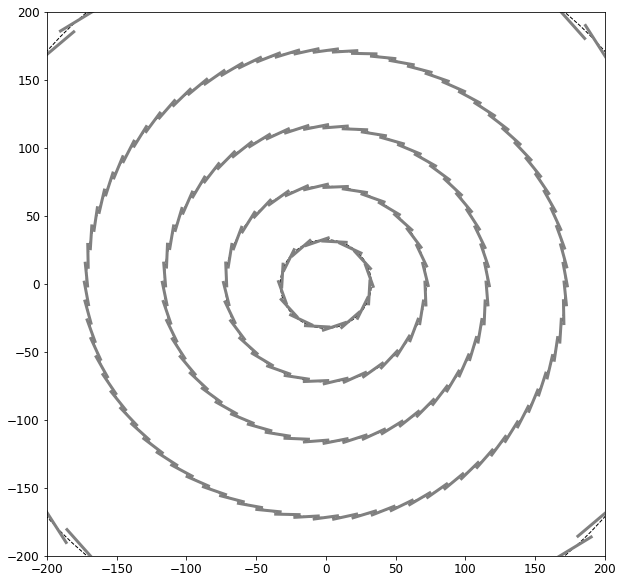

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetector(ax,True)
    
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetector(ax,True)
  


In [18]:
from TrackHelper import drawTrack


/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


[(8.0, 2.0, 120.0), (8.0, 2.0, 121.0), (8.0, 4.0, 240.0), (8.0, 6.0, 390.0), (8.0, 8.0, 584.0), (13.0, 2.0, 419.0), (13.0, 4.0, 586.0), (13.0, 6.0, 815.0), (13.0, 8.0, 1064.0), (17.0, 2.0, 1249.0), (17.0, 2.0, 1250.0), (17.0, 4.0, 1578.0)]
[((8.0, 2.0, 120.0), 31.45208784294837, -0.6597794257140777), ((8.0, 2.0, 121.0), 33.568362719138676, -0.7515999187210838), ((8.0, 4.0, 240.0), 71.2521473252097, -3.392250574944228), ((8.0, 6.0, 390.0), 115.69761975071593, -8.977692114455522), ((8.0, 8.0, 584.0), 170.47748214395358, -19.6319913346033), ((13.0, 2.0, 419.0), 260.1533047147506, -46.565384668913225), ((13.0, 4.0, 586.0), 352.83545134094106, -88.17891822862373), ((13.0, 6.0, 815.0), 474.0059125344688, -168.77853198426544), ((13.0, 8.0, 1064.0), 594.0413413208214, -292.1628184586144), ((17.0, 2.0, 1249.0), 688.638276956692, -452.88499952018833), ((17.0, 2.0, 1250.0), 685.8683697485133, -446.5455892913783), ((17.0, 4.0, 1578.0), 748.2392750564533, -698.6386598403684)]


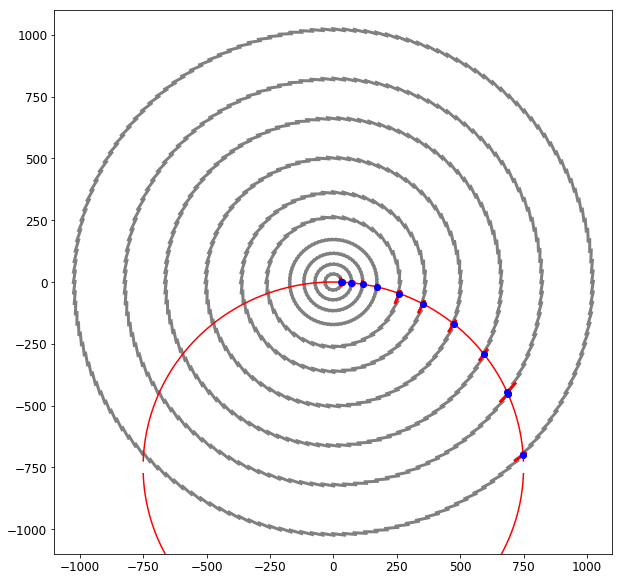

In [19]:
fig, ax = plt.subplots(1, figsize=(10,10))
yzoom = 1100
xzoom = 1*yzoom

ax.set_xlim((-xzoom, xzoom))
ax.set_ylim((-1*yzoom, yzoom))


trk_rc  = 750
trk_phi = 0*np.pi/400
trk_q   = +1

detGeo.drawDetector(ax,True)
drawTrack(trk_rc,trk_phi,trk_q,scale=1000)

ps_hitXs, ps_hitYs, modulesHit, hits = detGeo.getHits(trk_rc,trk_phi,trk_q)
detGeo.drawDetectorModules(modulesHit)
plt.plot(ps_hitXs,ps_hitYs,'ro')

print(modulesHit)

print(hits)
for h in hits:
    plt.plot(h[1],h[2],'bo')

# OK, now lets try to plot the hits of a bunch of tracks

Generating the tracks

In [20]:
np.random.seed(42)

# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []

nTrk = 50
hitID = 0

for trkI in range(nTrk):
    ptInv = np.random.uniform(0.01*0.001,1.33*0.001,1)[0]
    phi   = np.random.uniform(0.0,2*np.pi,1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt = 1./ptInv

    eventParticles.append((trkI,pt,phi,q,10))

    #xHits, yHits = getHits(pt,phi,q,rDet)
    ps_hitXs, ps_hitYs, modulesHit, hits = detGeo.getHits(pt,phi,q)

    solutions.append([hits,pt,phi,q,ps_hitXs,ps_hitYs])
    #truthHits+=hits

    for hitsInfo in hits:
        hitX   = hitsInfo[1]        
        hitY   = hitsInfo[2]        
        hitZ   = None
        eventTruth.append((hitID,trkI,hitX,hitY,hitZ,1.0))
        eventHits .append((hitID,hitX,hitY,hitZ,hitsInfo[0][0],hitsInfo[0][1],hitsInfo[0][2]))        
        hitID += 1



/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


Making reconstructed hits from the truth hits (Can add noise hits here later)

In [21]:
recHits = np.array(eventHits,dtype=float)

np.random.seed(42)
shuffle_index = np.random.permutation(len(recHits))
recHits = recHits[shuffle_index]
recHits[0:10]

array([[  81.        , -138.05920362,  485.26858637,           nan,
          13.        ,    6.        ,  842.        ],
       [ 218.        , -706.63669914,  737.49974238,           nan,
          17.        ,    4.        , 1653.        ],
       [  55.        ,  649.59257111, -132.61550454,           nan,
          13.        ,    8.        , 1068.        ],
       [ 598.        ,   -5.03694206,   31.54448923,           nan,
           8.        ,    2.        ,  125.        ],
       [ 264.        ,  477.96751826, -161.73735243,           nan,
          13.        ,    6.        ,  815.        ],
       [ 155.        ,   29.49170865,  -11.22184028,           nan,
           8.        ,    2.        ,  119.        ],
       [ 482.        , -474.07189036,  168.66126597,           nan,
          13.        ,    6.        ,  854.        ],
       [ 321.        ,  191.88013391,  311.51265757,           nan,
          13.        ,    4.        ,  597.        ],
       [ 580.        ,  

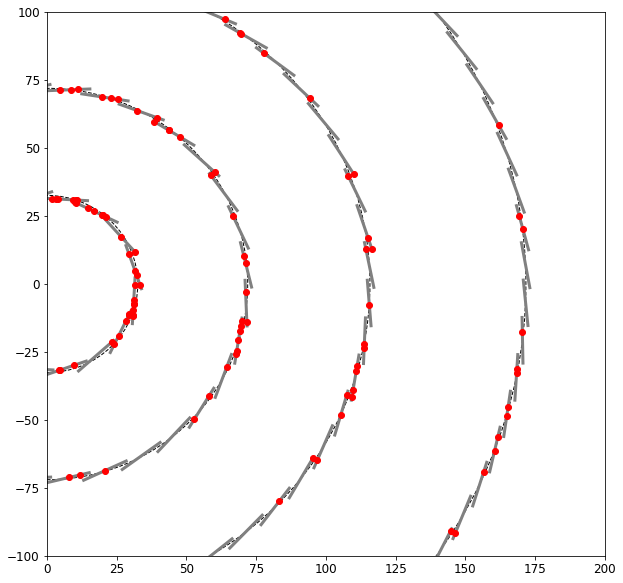

In [22]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 100

ax.set_xlim((-1*zoom+zoom, zoom+zoom))
ax.set_ylim((-1*zoom, zoom))
detGeo.drawDetector(ax,True)

plt.plot(recHits[:,1],recHits[:,2],'ro')

# Plot Solutions

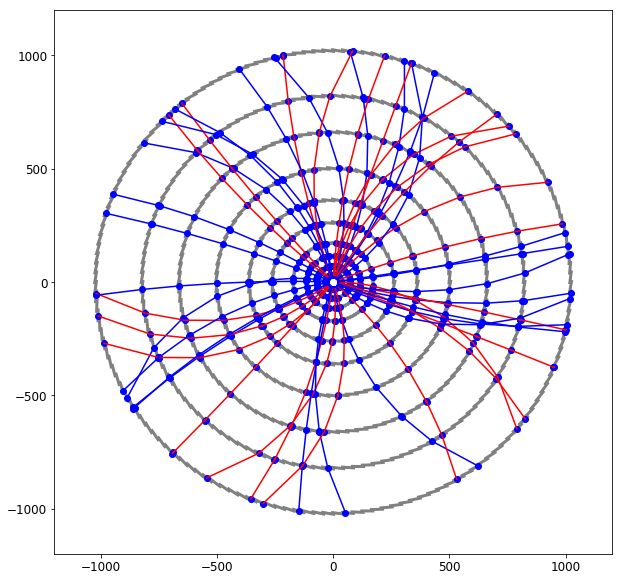

In [23]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1200

ax.set_xlim((-1*zoom+1, zoom+1))
ax.set_ylim((-1*zoom, zoom))
detGeo.drawDetector(ax,True)
plt.plot(recHits[:,1],recHits[:,2],'bo')

for s in solutions:

    thisHits = s[0]
    thisPt   = s[1]
    thisPhi  = s[2]    
    thisQ    = s[3]        

    hitXs = []
    hitYs = []    
    for h in thisHits:
        hitXs.append(h[1])
        hitYs.append(h[2])
    
    color = "b" if (thisQ < 0) else "r"
    plt.plot(hitXs,hitYs,color)

# Test "Offline"  algorithm (ie: Hough transform) works

First try one track

In [24]:
# given global posision and phi range, return consistent 1/rC
from TrackHelper import getPhiCircle

def getHT(hX, hY, phi):
    R2 = hX**2 + hY**2
    phi_circle = getPhiCircle(phi,1)

    f = 2/R2*(hX*np.cos(phi_circle)+hY*np.sin(phi_circle))
    return f

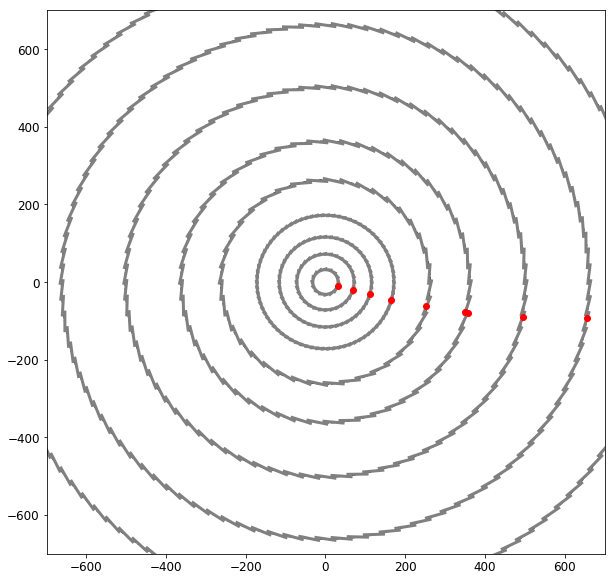

In [25]:
sTest = solutions[0]
#testHits = np.array(sTest[0])

truthHits_raw = []
for tH in sTest[0]:
    truthHits_raw.append( (tH[1],tH[2]) )

#print(truthHits_raw)
tHits = np.array(truthHits_raw)

fig, ax = plt.subplots(1, figsize=(10,10))

zoom = 700

ax.set_xlim((-1*zoom+1, zoom+1))
ax.set_ylim((-1*zoom, zoom))
detGeo.drawDetector(ax,True)


plt.plot(tHits[:,0],tHits[:,1],'ro')

Truth Track, 1/Rc / phi / q 0.0005043929568785185 5.9735141613602165 -1


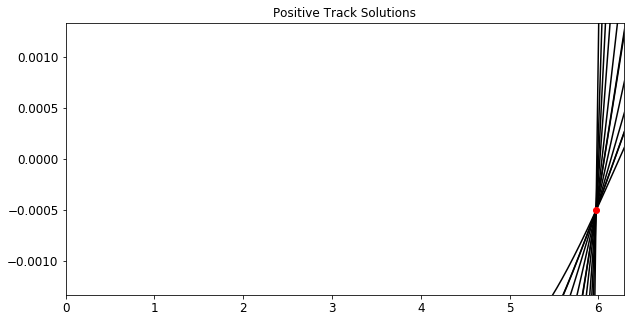

In [26]:
plt.figure(1, figsize=(10, 5))
plt.title("Positive Track Solutions")
plt.axis([0, 2*np.pi, -1.33*0.001,1.33*0.001])  

soln = solutions[0]

truePhi = soln[2]
trueQ   = soln[3]
trueRc  = soln[1]
print("Truth Track, 1/Rc / phi / q",1./trueRc,truePhi,trueQ)


for hitItr in range(len(soln[0])):

    hitX = soln[0][hitItr][1]
    hitY = soln[0][hitItr][2]

    hitPhi = np.arctan2(hitY, hitX)   
    
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    
    # Only consider plasiblel track (eg: from the orgin)
    phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)

    
    f = getHT(hitX, hitY,  phiXRange)
    plt.plot(phiXRange,f,"k")


plt.plot(truePhi,trueQ*1/trueRc,"ro")    

plt.show()

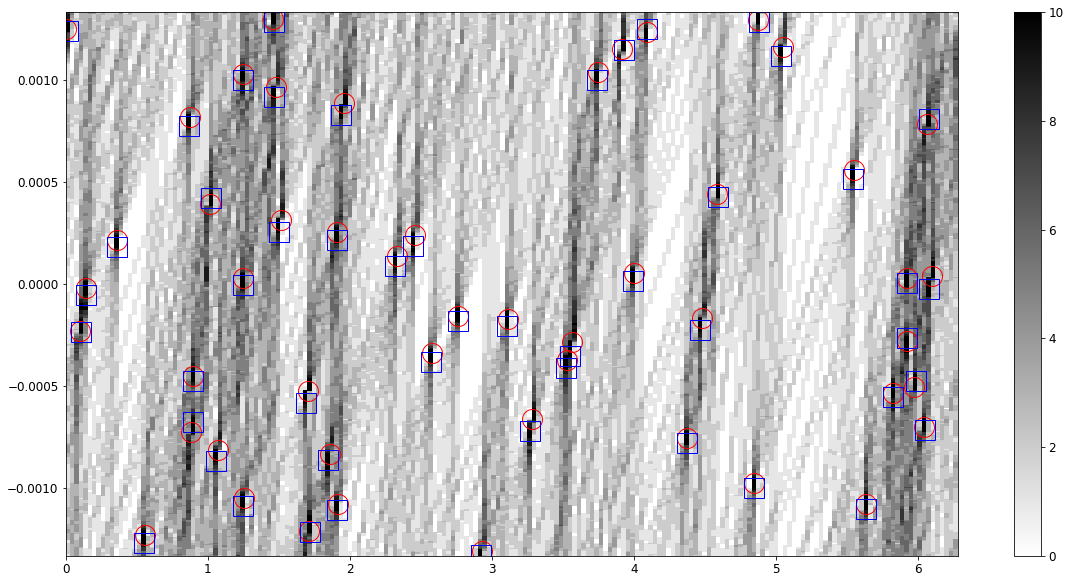

In [27]:
from HTTrackFinder import HTTrackFinding

def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

testMod = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                         nLayers=len(detGeo.layers),
                         minHitsPerTrack=len(detGeo.layers)-2)
fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    
    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    testMod.addHit(globalLayID, hitID, hitR, hitPhi)


#    
# Plot Truth
#
for part in eventParticles:
    truePhi = part[2]
    trueQ   = part[3]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(testMod.xBins, testMod.yBins)
cmap = plt.get_cmap('binary')

testMod.combineLayerMaps()

#
#  Tracks
#
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(testMod.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)


recoTracks = testMod.findTracks(overlapLogicFirstHit=True)
for rT in recoTracks:
    recPhi,recCurv,recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')
        
plt.show()

In [28]:
from TrackHelper import getTruthDF
truth = getTruthDF(eventTruth)
truth.head()

solns = testMod.getSolutions()



In [29]:
solns.info()
truth.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
event_id    500 non-null int64
hit_id      500 non-null float64
track_id    500 non-null int64
dtypes: float64(1), int64(2)
memory usage: 11.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 3 columns):
hit_id         610 non-null float64
particle_id    610 non-null float64
weight         610 non-null float64
dtypes: float64(3)
memory usage: 14.4 KB


In [30]:
from trackml.score import score_event

score_event(truth,solns)



0.7081967213114755

In [31]:
# Need to remove overlap ?
solns["hit_id"].value_counts()

533.0    1
376.0    1
13.0     1
14.0     1
15.0     1
17.0     1
18.0     1
19.0     1
20.0     1
21.0     1
22.0     1
388.0    1
400.0    1
488.0    1
496.0    1
492.0    1
248.0    1
380.0    1
436.0    1
384.0    1
504.0    1
512.0    1
440.0    1
444.0    1
416.0    1
508.0    1
420.0    1
424.0    1
368.0    1
364.0    1
        ..
151.0    1
493.0    1
347.0    1
153.0    1
129.0    1
459.0    1
131.0    1
354.0    1
303.0    1
358.0    1
362.0    1
558.0    1
342.0    1
346.0    1
407.0    1
350.0    1
454.0    1
479.0    1
458.0    1
149.0    1
461.0    1
183.0    1
185.0    1
383.0    1
187.0    1
193.0    1
389.0    1
294.0    1
298.0    1
60.0     1
Name: hit_id, Length: 500, dtype: int64

# Add Logic for overlap removal

In [32]:
testModFitting = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                                nLayers=len(detGeo.layers),
                                minHitsPerTrack=len(detGeo.layers)-2)



#
# Loop on rec hits
# 
for hitInfo in recHits:

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    
    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    testModFitting.addHit(globalLayID, hitID, hitR, hitPhi)



testModFitting.combineLayerMaps()
recoRoads = testModFitting.findTracks(overlapLogicFirstHit=False)

Add Rs and phis to the input hits (needed for the fitter)

In [33]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

recHitsNew = np.c_[recHits,Rs,Phis]

Fit Tracks

In [34]:
fittedTracks = testModFitting.fitTracks(recoRoads,recHitsNew,0.01)
print(len(recoTracks))
print(len(recoRoads))
print(len(fittedTracks))

50
51
51


## Remove Overlap

In [35]:
solnsFitted = testModFitting.getSolutionsFromTracks(fittedTracks)
nTracksPerHit = solnsFitted["hit_id"].value_counts()
multiTperH = nTracksPerHit[nTracksPerHit > 1]
testModFitting.removeOverlap(fittedTracks,multiTperH.index)

In [36]:
solnsCleaned = testModFitting.getSolutionsFromTracks(fittedTracks)
solnsCleaned.head()

event_id  hit_id  track_id
0         0    60.0         0
1         0    61.0         0
2         0    62.0         0
3         0    63.0         0
4         0    64.0         0

In [37]:
score_event(truth,solnsCleaned)

0.9229508196721312

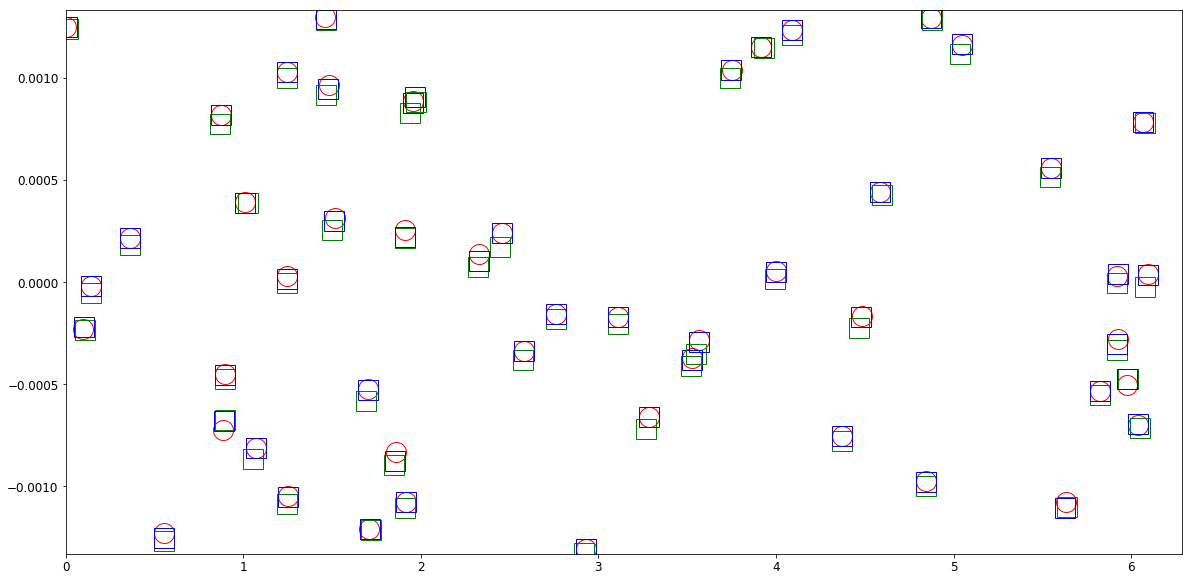

In [38]:
fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    truePhi = part[2]
    trueQ   = part[3]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)

for trkIndex, rT in enumerate(recoRoads):
    recPhi,recCurv,recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')
    
    fT = fittedTracks[trkIndex]
    fitPhi, fitCurv, fitQ = fT[0]

    diffPhi = abs(recPhi - fitPhi)/recPhi
    diffCurv = abs(recCurv - fitCurv)
    #print(recPhi,recCurv,fitPhi,fitCurv,diffPhi,diffCurv)
    ax.plot(fitPhi,fitCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [39]:
testRoad = testModFitting.tracks[-5]

In [40]:
from HTTrackFinder import DORead
from HTTrackFinder import correctTrackPhis
testRoadFullInfo = DORead(testRoad,recHitsNew)
correctTrackPhis(testRoadFullInfo,True)
print(testRoadFullInfo)

phiDiff 0.0
phiDiff now 0.0
phiDiff 0.0019956136503385125
phiDiff now 0.0019956136503385125
phiDiff 0.013694699651724207
phiDiff now 0.013694699651724207
phiDiff 0.04160925685843431
phiDiff now 0.04160925685843431
phiDiff 0.029377969492317746
phiDiff now 0.029377969492317746
phiDiff 0.04865969415794513
phiDiff now 0.04865969415794513
phiDiff 0.07513861039135872
phiDiff now 0.07513861039135872
phiDiff 0.07941536500971846
phiDiff now 0.07941536500971846
phiDiff 0.08170744100285532
phiDiff now 0.08170744100285532
phiDiff 0.11645102099600635
phiDiff now 0.11645102099600635
phiDiff 0.11432866305227396
phiDiff now 0.11432866305227396
phiDiff 0.16397300972889894
phiDiff now 0.16397300972889894
phiDiff 0.22244129286873182
phiDiff now 0.22244129286873182
phiDiff -6.0027099809049185
phiDiff now 0.28047532627466776
phiDiff -5.931423671934667
phiDiff now 0.35176163524491955
phiDiff -5.92896736411419
phiDiff now 0.35421794306539667
[[6.046381840828596, -0.0007133333333333334, -1.0], array([[ 281.  

In [41]:
def drawTrackToFit(fullTrackInfo,color="k"):
    plt.plot(fullTrackInfo[1][:,-2],fullTrackInfo[1][:,-1],color+"o")

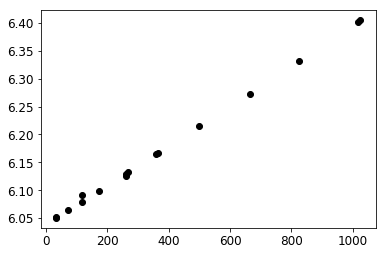

In [42]:
drawTrackToFit(testRoadFullInfo)